In [1]:
from IPython.display import YouTubeVideo

# 1. Intro To CNNs

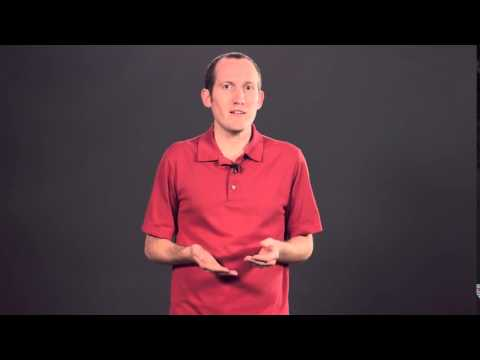

In [2]:
YouTubeVideo('B61jxZ4rkMs', width=720, height=400)

# 2. Color

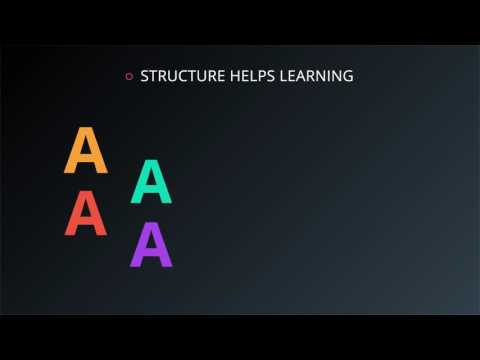

In [3]:
YouTubeVideo('BdQccpMwk80', width=720, height=400)

## QUIZ QUESTION

What would be easier for your classifier to learn?
- (A) R, G, B
- (B) (R + G + B) / 3

Answer: B

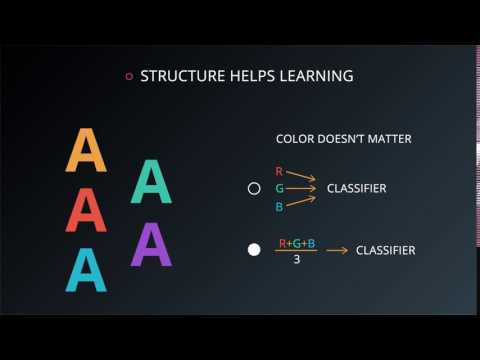

In [4]:
YouTubeVideo('xpyldyLlMFg', width=720, height=400)

# 3. Statistical Invariance

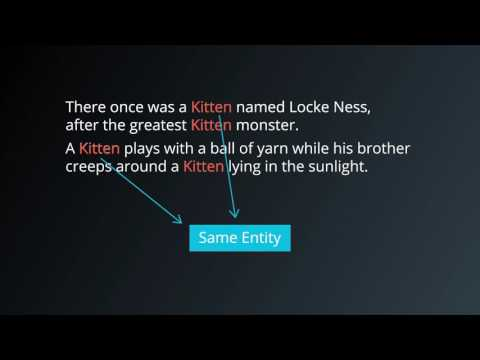

In [5]:
YouTubeVideo('0Hr5YwUUhr0', width=720, height=400)

# 4. Convolutional Networks

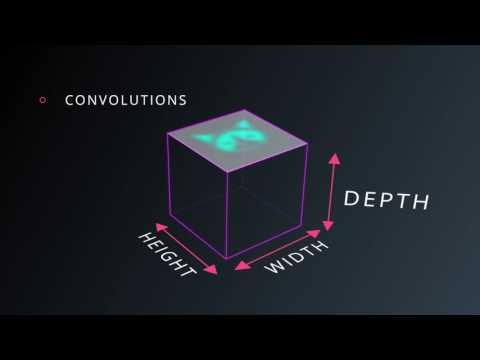

In [6]:
YouTubeVideo('ISHGyvsT0QY', width=720, height=400)

# 5. Intuition

Let's develop better intuition for how Convolutional Neural Networks (CNN) work. We'll examine how humans classify images, and then see how CNNs use similar approaches.

Let’s say we wanted to classify the following image of a dog as a Golden Retriever.

<img src="img/dog-1210559-1280.jpg" width=600>
<center>An image that we'd like to classify as a Golden Retriever.</center>

As humans, how do we do this?

One thing we do is that we identify certain parts of the dog, such as the nose, the eyes, and the fur. We essentially break up the image into smaller pieces, recognize the smaller pieces, and then combine those pieces to get an idea of the overall dog.

In this case, we might break down the image into a combination of the following:

- A nose
- Two eyes
- Golden fur

These pieces can be seen below:

<img src="img/screen-shot-2016-11-24-at-12.49.08-pm.png" width=200>
<center>The eye of the dog.</center>

<img src="img/screen-shot-2016-11-24-at-12.49.43-pm.png" width=200>
<center>The nose of the dog.</center>

<img src="img/screen-shot-2016-11-24-at-12.50.54-pm.png" width=200>
<center>The fur of the dog.</center>

## Going One Step Further
But let’s take this one step further. How do we determine what exactly a nose is? A Golden Retriever nose can be seen as an oval with two black holes inside it. Thus, one way of classifying a Retriever’s nose is to to break it up into smaller pieces and look for black holes (nostrils) and curves that define an oval as shown below.

<img src="img/screen-shot-2016-11-24-at-12.51.47-pm.png" width=200>
<center>A curve that we can use to determine a nose.</center>

<img src="img/screen-shot-2016-11-24-at-12.51.51-pm.png" width=100>
<center>A nostrill that we can use to classify a nose of the dog.</center>

Broadly speaking, this is what a CNN learns to do. It learns to recognize basic lines and curves, then shapes and blobs, and then increasingly complex objects within the image. Finally, the CNN classifies the image by combining the larger, more complex objects.

In our case, the levels in the hierarchy are:

- Simple shapes, like ovals and dark circles
- Complex objects (combinations of simple shapes), like eyes, nose, and fur
- The dog as a whole (a combination of complex objects)

With deep learning, we don't actually program the CNN to recognize these specific features. Rather, the CNN learns on its own to recognize such objects through forward propagation and backpropagation!

It's amazing how well a CNN can learn to classify images, even though we never program the CNN with information about specific features to look for.

<img src="img/heirarchy-diagram.jpg" width=600>
<center>An example of what each layer in a CNN might recognize when classifying a picture of a dog.</center>

A CNN might have several layers, and each layer might capture a different level in the hierarchy of objects. The first layer is the lowest level in the hierarchy, where the CNN generally classifies small parts of the image into simple shapes like horizontal and vertical lines and simple blobs of colors. The subsequent layers tend to be higher levels in the hierarchy and generally classify more complex ideas like shapes (combinations of lines), and eventually full objects like dogs.

Once again, the CNN learns **all of this on its own**. We don't ever have to tell the CNN to go looking for lines or curves or noses or fur. The CNN just learns from the training set and discovers which characteristics of a Golden Retriever are worth looking for.

That's a good start! Hopefully you've developed some intuition about how CNNs work.

Next, let’s look at some implementation details.

# 6. Filters

## Breaking up an Image
The first step for a CNN is to break up the image into smaller pieces. We do this by selecting a width and height that defines a filter.

The filter looks at small pieces, or patches, of the image. These patches are the same size as the filter.

<img src="img/vlcsnap-2016-11-24-15h52m47s438.png" width=600>
<center>As shown in the previous video, a CNN uses filters to split an image into smaller patches. The size of these patches matches the filter size</center>

We then simply slide this filter horizontally or vertically to focus on a different piece of the image.

The amount by which the filter slides is referred to as the 'stride'. The stride is a hyperparameter which you, the engineer, can tune. Increasing the stride reduces the size of your model by reducing the number of total patches each layer observes. However, this usually comes with a reduction in accuracy.

Let’s look at an example. In this zoomed in image of the dog, we first start with the patch outlined in red. The width and height of our filter define the size of this square.

<img src="img/retriever-patch.png" width=600>
<center>One patch of the Golden Retriever image</center>

We then move the square over to the right by a given stride (2 in this case) to get another patch.

<img src="img/retriever-patch-shifted.png" width=600>
<center>We move our square to the right by two pixels to create another patch.</center>

What's important here is that we are grouping together adjacent pixels and treating them as a collective.

In a normal, non-convolutional neural network, we would have ignored this adjacency. In a normal network, we would have connected every pixel in the input image to a neuron in the next layer. In doing so, we would not have taken advantage of the fact that pixels in an image are close together for a reason and have special meaning.

By taking advantage of this local structure, our CNN learns to classify local patterns, like shapes and objects, in an image.

## Filter Depth
It's common to have more than one filter. Different filters pick up different qualities of a patch. For example, one filter might look for a particular color, while another might look for a kind of object of a specific shape. The amount of filters in a convolutional layer is called the *filter depth*.

<img src="img/neilsen-pic.png" width=400>
<center>In the above example, a patch is connected to a neuron in the next layer. Source: Michael Nielse.</center>

How many neurons does each patch connect to?

That’s dependent on our filter depth. If we have a depth of k, we connect each patch of pixels to k neurons in the next layer. This gives us the height of k in the next layer, as shown below. In practice, k is a hyperparameter we tune, and most CNNs tend to pick the same starting values.

<img src="img/filter-depth.png" width=400>
<center>Chossing a filter depth of k connects each patch to k neurons in the next year.</center>

But why connect a single patch to multiple neurons in the next layer? Isn’t one neuron good enough?

Multiple neurons can be useful because a patch can have multiple interesting characteristics that we want to capture.

For example, one patch might include some white teeth, some blonde whiskers, and part of a red tongue. In that case, we might want a filter depth of at least three - one for each of teeth, whiskers, and tongue.

<img src="img/teeth-whiskers-tongue.png" width=300>
<center>This patch of the dog has many interesting features we may want to capture. These include the presence of teeth, the presence of whiskers, and the pink color of the tongue.</center>

Having multiple neurons for a given patch ensures that our CNN can learn to capture whatever characteristics the CNN learns are important.

Remember that the CNN isn't "programmed" to look for certain characteristics. Rather, it learns **on its own** which characteristics to notice.

# 7. Feature Map Sizes

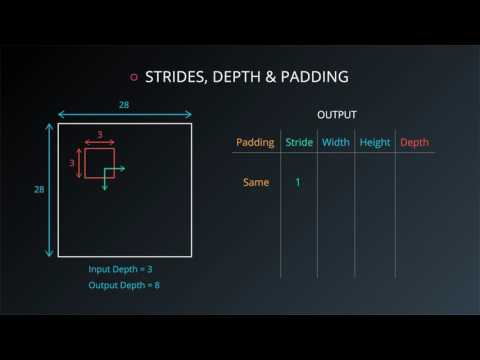

In [7]:
YouTubeVideo('lp1NrLZnCUM', width=720, height=400)

What are the width, height and depth for padding = 'same', stride = 1?

Enter your answers in the format "width, height, depth"

Answer: 28, 28, 8

<hr>

What are the width, height and depth for padding = 'valid', stride = 1?

Enter your answers in the format "width, height, depth"

Answer: 26, 26, 8

<hr>

What are the width, height and depth for padding = 'valid', stride = 2?

Enter your answers in the format "width, height, depth"

Answer: 13, 13, 8

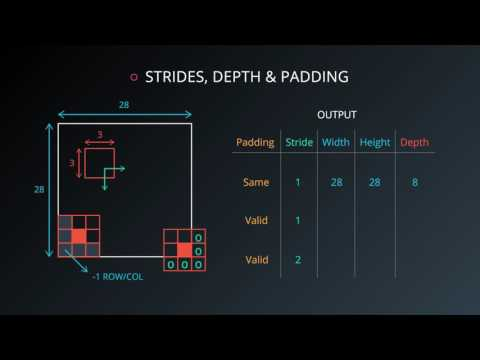

In [8]:
YouTubeVideo('W4xtf8LTz1c', width=720, height=400)

# 8. Convolutions continued

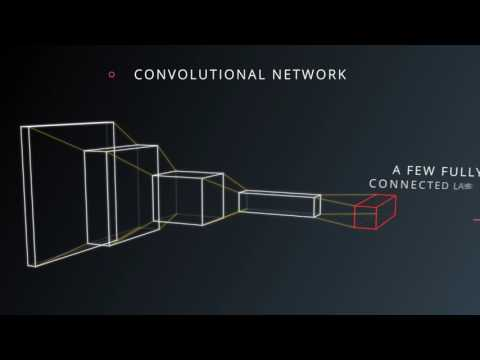

In [9]:
YouTubeVideo('utOv-BKI_vo', width=720, height=400)

Note, a "Fully Connected" layer is a standard, non convolutional layer, where all inputs are connected to all output neurons. This is also referred to as a "dense" layer, and is what we used in the previous two lessons.

# 9. Parameters

## Parameter Sharing

<img src="img/vlcsnap-2016-11-24-16h01m35s262.png" width=600>
<center>The weights, w, are shared across patches for a given layer in a CNN to detect the cat above regardless of where in the image it is located.</center>

When we are trying to classify a picture of a cat, we don’t care where in the image a cat is. If it’s in the top left or the bottom right, it’s still a cat in our eyes. We would like our CNNs to also possess this ability known as translation invariance. How can we achieve this?

As we saw earlier, the classification of a given patch in an image is determined by the weights and biases corresponding to that patch.

If we want a cat that’s in the top left patch to be classified in the same way as a cat in the bottom right patch, we need the weights and biases corresponding to those patches to be the same, so that they are classified the same way.

This is exactly what we do in CNNs. The weights and biases we learn for a given output layer are shared across all patches in a given input layer. Note that as we increase the depth of our filter, the number of weights and biases we have to learn still increases, as the weights aren't shared across the output channels.

There’s an additional benefit to sharing our parameters. If we did not reuse the same weights across all patches, we would have to learn new parameters for every single patch and hidden layer neuron pair. This does not scale well, especially for higher fidelity images. Thus, sharing parameters not only helps us with translation invariance, but also gives us a smaller, more scalable model.

## Padding

<img src="img/screen-shot-2016-11-24-at-10.05.37-pm.png" width=300>
<center>A 5x5 grid with a 3x3 filter. Source: Andrej Karpathy.</center>

## QUIZ QUESTION

Let's say we have a 5x5 grid (as shown above) and a filter of size 3x3 with a stride of 1. What's the width and height of the next layer?

Answer: 3x3. We see that we can fit at most three patches in each direction, giving us a dimension of 3x3 in our next layer.

<hr>

As we can see, the width and height of each subsequent layer decreases in the above scheme.

In an ideal world, we'd be able to maintain the same width and height across layers so that we can continue to add layers without worrying about the dimensionality shrinking and so that we have consistency. How might we achieve this? One way is to simply add a border of 0s to our original 5x5 image. You can see what this looks like in the below image.

<img src="img/screen-shot-2016-11-24-at-10.05.46-pm.png" width=400>
<center>The same grid with 0 padding. Source: Andrej Karpathy.</center>

This would expand our original image to a 7x7. With this, we now see how our next layer's size is again a 5x5, keeping our dimensionality consistent.

## Dimensionality
From what we've learned so far, how can we calculate the number of neurons of each layer in our CNN?

Given:

- our input layer has a width of W and a height of H
- our convolutional layer has a filter size F
- we have a stride of S
- a padding of P
- and the number of filters K,

the following formula gives us the width of the next layer: `W_out =[ (W−F+2P)/S] + 1`.

The output height would be `H_out = [(H-F+2P)/S] + 1`.

And the output depth would be equal to the number of filters `D_out = K`.

The output volume would be `W_out * H_out * D_out`.

Knowing the dimensionality of each additional layer helps us understand how large our model is and how our decisions around filter size and stride affect the size of our network.

# 10. Quiz: Convolution Output Shape

## Introduction
For the next few quizzes we'll test your understanding of the dimensions in CNNs. Understanding dimensions will help you make accurate tradeoffs between model size and performance. As you'll see, some parameters have a much bigger impact on model size than others.

## Setup
H = height, W = width, D = depth

- We have an input of shape 32x32x3 (HxWxD)
- 20 filters of shape 8x8x3 (HxWxD)
- A stride of 2 for both the height and width (S)
- With padding of size 1 (P)

Recall the formula for calculating the new height or width:

```
new_height = (input_height - filter_height + 2 * P)/S + 1
new_width = (input_width - filter_width + 2 * P)/S + 1
```


Convolutional Layer Output Shape
What's the shape of the output?

The answer format is HxWxD, so if you think the new height is 9, new width is 9, and new depth is 5, then type 9x9x5.

Answer: 14x14x20

# 11. Solution: Convolution Output Shape

## Solution
The answer is 14x14x20.

We can get the new height and width with the formula resulting in:

```
(32 - 8 + 2 * 1)/2 + 1 = 14
(32 - 8 + 2 * 1)/2 + 1 = 14
```

The new depth is equal to the number of filters, which is 20.
This would correspond to the following code:

```python
input = tf.placeholder(tf.float32, (None, 32, 32, 3))
filter_weights = tf.Variable(tf.truncated_normal((8, 8, 3, 20))) # (height, width, input_depth, output_depth)
filter_bias = tf.Variable(tf.zeros(20))
strides = [1, 2, 2, 1] # (batch, height, width, depth)
padding = 'SAME'
conv = tf.nn.conv2d(input, filter_weights, strides, padding) + filter_bias
```

Note the output shape of conv will be [1, 16, 16, 20]. It's 4D to account for batch size, but more importantly, it's not [1, 14, 14, 20]. This is because the padding algorithm TensorFlow uses is not exactly the same as the one above. An alternative algorithm is to switch padding from 'SAME' to 'VALID' which would result in an output shape of [1, 13, 13, 20]. If you're curious how padding works in TensorFlow, read [this document](https://www.tensorflow.org/api_guides/python/nn#Convolution).

In summary TensorFlow uses the following equation for 'SAME' vs 'VALID'

**SAME Padding**, the output height and width are computed as:

out_height = ceil(float(in_height) / float(strides[1]))

out_width = ceil(float(in_width) / float(strides[2]))

**VALID Padding**, the output height and width are computed as:

out_height = ceil(float(in_height - filter_height + 1) / float(strides[1]))

out_width = ceil(float(in_width - filter_width + 1) / float(strides[2]))
NEXT

# 12. Quiz: Number of Parameters

We're now going to calculate the number of parameters of the convolutional layer. The answer from the last quiz will come into play here!

Being able to calculate the number of parameters in a neural network is useful since we want to have control over how much memory a neural network uses.

## Setup
H = height, W = width, D = depth

- We have an input of shape 32x32x3 (HxWxD)
- 20 filters of shape 8x8x3 (HxWxD)
- A stride of 2 for both the height and width (S)
- Zero padding of size 1 (P)

## Output Layer
- 14x14x20 (HxWxD)

## Hint
Without parameter sharing, each neuron in the output layer must connect to each neuron in the filter. In addition, each neuron in the output layer must also connect to a single bias neuron.

### Convolution Layer Parameters 1
How many parameters does the convolutional layer have (without parameter sharing)?

# 13. Solution: Number of Parameters

Solution
There are 756560 total parameters. That's a HUGE amount! Here's how we calculate it:
```
(8 * 8 * 3 + 1) * (14 * 14 * 20) = 756560
```

`8 * 8 * 3` is the number of weights, we add 1 for the bias. Remember, each weight is assigned to every single part of the output `(14 * 14 * 20)`. So we multiply these two numbers together and we get the final answer.